# The computational results are plotted against analytic results at $k=0$ and $l=0$

The green curves indicate $\dot\gamma$ and $a$ values where $\text{Re}(\sigma)=0$ (oscillatory). The blue dashed curve indicate where $\sigma = 0$ (non-oscillatory).

In [1]:
import sys
sys.path.append("../../core-scripts")
from Utilities import clean_spec_2D, max_re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

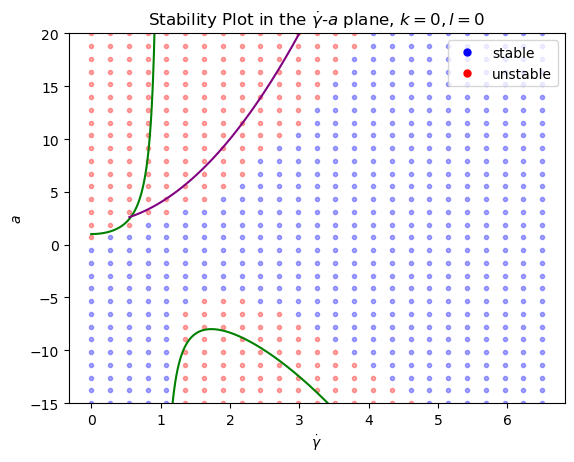

In [4]:
# These results came from when the derivative operator was still multiplied by 2
# Also these eigenvalues were not "pruned" with the method from Boyd

# load in computational results from Alex's code 
ev = np.loadtxt("data/ev-data-1", delimiter=',')
gd = np.loadtxt("data/gdv-1", delimiter=',')
a = np.loadtxt("data/av-1", delimiter=',')
n,m = len(gd), len(gd[0])

# plot the computational results
for i in range(n):
    for j in range(m):
        c = "red" if ev[i][j] > 0 else "blue"
        plt.plot(gd[i][j],a[i][j],".",color=c, picker=True, alpha=0.34)
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')

# The first two separate shear ranges is to avoid the asymptote 
# from getting connected
gds1 = np.linspace(0,0.98,130)
gds2 = np.linspace(1.05,6,500)
# The third shear range is for the case where only the real part of sigma is 0
gds3 = np.linspace(0.55,6,700)
a1 = (1 + np.power(gds1,2))**2 / (1 - np.power(gds1,2))
a2 = (1 + np.power(gds2,2))**2 / (1 - np.power(gds2,2))
y = 0.01
a3 = 2 * (1 + gds3**2)
plt.plot(gds1,a1,c="green")
plt.plot(gds2,a2,c="green")
plt.plot(gds3,a3,c='purple')
plt.plot()
plt.ylim(-15,20)

# make the plot
plt.title("Stability Plot in the $\dot\gamma$-$a$ plane, $k=0,l=0$")
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.show()

(0.8, 3.4)

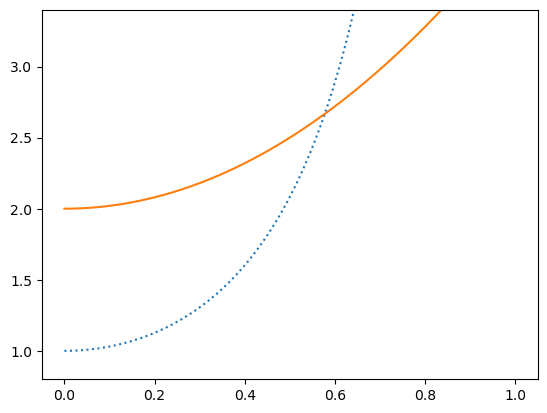

In [15]:
# Zoomed in view of the two branches
gds1 = np.linspace(0,0.98,130)
gds3 = np.linspace(0,1,700)
a1 = (1 + np.power(gds1,2))**2 / (1 - np.power(gds1,2))
a3 = 2 * (1 + gds3**2)

plt.plot(gds1,a1,":")
plt.plot(gds3,a3)
plt.plot()
plt.ylim(0.8,3.4)

In [9]:
gds = np.linspace(0,6,20)
acts = np.linspace(-15,15,20)
zero_k_l_spec = np.zeros((len(acts),len(gds)), dtype=np.complex128)
for i in range(len(gds)):
    for j in range(len(acts)):
        zero_k_l_spec[i][j],_ = max_re(clean_spec_2D(0,gds[i],acts[j],ell_over_W_squared=0))
    print("{}/{} shear values processed".format(i+1,len(gds)))

1/20 shear values processed
2/20 shear values processed
3/20 shear values processed
4/20 shear values processed
5/20 shear values processed
6/20 shear values processed
7/20 shear values processed
8/20 shear values processed
9/20 shear values processed
10/20 shear values processed
11/20 shear values processed
12/20 shear values processed
13/20 shear values processed
14/20 shear values processed
15/20 shear values processed
16/20 shear values processed
17/20 shear values processed
18/20 shear values processed
19/20 shear values processed
20/20 shear values processed


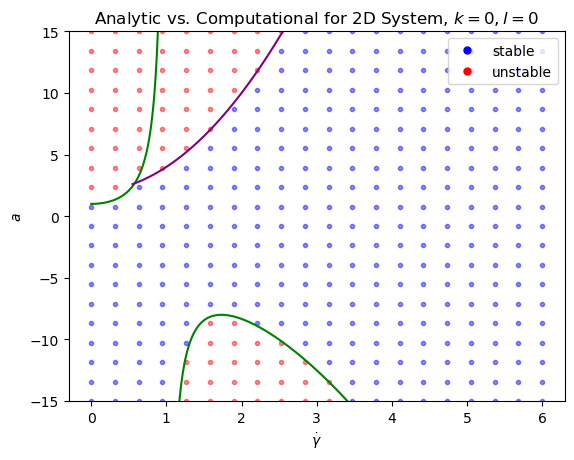

In [16]:
# plot the computational results
for i in range(len(gds)):
    for j in range(len(acts)):
        c = "red" if np.real(zero_k_l_spec[i][j]) > 0 else "blue"
        plt.plot(gds[i],acts[j],".",color=c, picker=True, alpha=0.45)
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")

# The first two separate shear ranges is to avoid the asymptote 
# from getting connected
gds1 = np.linspace(0,0.98,130)
gds2 = np.linspace(1.05,6,500)
# The third shear range is for the case where only the real part of sigma is 0
gds3 = np.linspace(0.55,6,700)
a1 = (1 + np.power(gds1,2))**2 / (1 - np.power(gds1,2))
a2 = (1 + np.power(gds2,2))**2 / (1 - np.power(gds2,2))
y = 0.01
a3 = 2 * (1 + gds3**2)
plt.plot(gds1,a1,c="green")
plt.plot(gds2,a2,c="green")
plt.plot(gds3,a3,c='purple')
plt.plot()
plt.ylim(-15,15)

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
plt.title("Analytic vs. Computational for 2D System, $k=0,l=0$")
plt.legend(handles=[blue_dot, red_dot], loc='upper right')
plt.show()